### Podatkovno rudarjenje, koda za vmesno poročilo o opravljenem delu, 01. 04. 2019

# Priprava podatkov in osnovna vizualizacija

**Nejc Prijatelj**

**Žan Pristopec**

**Matevž Kušar**

V tem notebook-u bomo pisali kodo za obdelavo podatkov, iz katerih bomo s pomočjo pythona, statistike in vizualizacije poiskusili odgovoriti na čim več vprašanj, ki smo si jih zastavili pri izbiri projekta.

## Podatki

Kratek opis podatkov je bil podan že pri osnutku projekta, tu pa bi si najprej na hitro pogledali kaj točno dani podatki vsebujejo. Link do podatkov(https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016).

Vse podatke ki smo jih dobili s spletne strani Kaggle hranimo v datoteki "master.csv".

Vsak podatek v tej zbirki ima naslednje atribute:
* *country:* država v kateri so bili zabeleženi samomori.
* *year:* leto na katerega se nanašajo podatki.
* *sex:* spol starostne skupine za to leto.
* *age_group:* starostna skupina.
* *count_of_suicides:* število samomorov za to leto.
* *population:* število oseb določenega spola v tem letu, za to starostno skupino.
* *suicide_rate:* pogostost samomorov - število samomorov na 100 tisoč ljudi.
* *country-year_composite_key:* država-leto ključ.
* *HDI_for_year:* indeks človekovega razvoja (izračunano iz življenjske dobe, stopnje izobrazbe in življenjske ravni).
* *GDP_for_year:* bruto domači proizvod države za tisto leto.
* *GDP_per_capita:* bruto domači proizvod na prebivalca države za tisto leto.
* *generation:* generacija (temelji na povprečju starostne skupine).

S pomočjo zgoraj naštetih atributov bomo v vmesnem poročilu podatke prebrali, ter jih vizualno predstavili.


### Pridobivanje podatkov

S preprosto funkcijo smo prebrali podatke iz datoteke "master.csv", v pandas dataframe, s pomočjo katerega smo jih obdelali in prestavili vizualno.

In [1]:
import pandas as pd

main = pd.read_csv('master.csv', sep=',', encoding='cp1250', header=1, names = ['country', 'year', 'sex', 'age', 'suicide_no', 'population', 'suicide_per_100k', 'country_year', 'HDI', 'GDP', 'GPD_per_capita', 'generation'])


### Nekaj vizualnih predstavitev

Ker je tako velika količina podatkov prevelika da bi iz nje lahko kar tako ugotovili določene zanimive lastnosti, smo se odločili da bomo najprej naredili nekaj grafov da dobimo občutek s čem imamo opravka, in da predstavimo nekatere bolj zanimive podatke.

Pri spodnji kodi smo uporabili stopnjo samomorov, saj le ta ni odvisna od populacije države.

In [2]:
df = main[['country','suicide_per_100k']]
df1 = df.groupby(['country'], as_index=False).mean().sort_values(by=['suicide_per_100k'], ascending=False)
df2 = df1.reset_index(drop=True)[:10]
df2

,country,suicide_per_100k
0,Lithuania,40.415573
1,Sri Lanka,35.295152
2,Russian Federation,34.892377
3,Hungary,32.761516
4,Belarus,31.075913
5,Kazakhstan,30.511282
6,Latvia,29.259325
7,Slovenia,27.827857
8,Estonia,27.276905
9,Ukraine,26.582321


Spodaj je število vseh samomorov v podatkovni zbirki, razdeljenih po spolu.

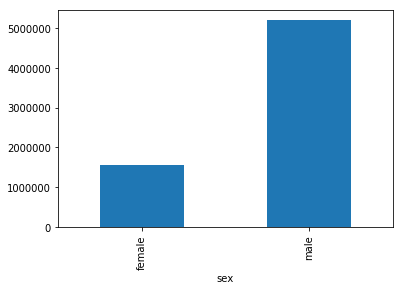

In [7]:
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


df = main[['sex', 'suicide_no']]
df = df.groupby('sex', as_index=False).sum()

graf = df.plot(kind='bar', x='sex', legend=False)
plt.savefig('images/sex_difference.png')

Povprečno število samomorov in povprečni BDP na prebivalca za vse države (razvrščeno po številu samomorov).

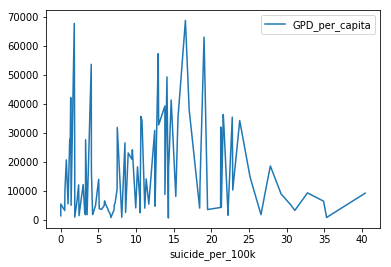

In [4]:
df2 = main[["country", "suicide_per_100k"]]
df2 = df2.groupby(['country'], as_index=False).mean()
df3 = main[["country", "GPD_per_capita"]]
df3 = df3.groupby(['country'], as_index=False).mean()
df2['GPD_per_capita'] = df3['GPD_per_capita']
df2 = df2[['suicide_per_100k', 'GPD_per_capita']]
df2 = df2.sort_values(by=['suicide_per_100k'], ascending=False).reset_index(drop=True)
df2

ax = plt.gca()

df2.plot(kind='line',x='suicide_per_100k',y='GPD_per_capita',ax=ax)
plt.savefig('images/GPD_and_suicide_rate.png')
plt.show()


Tu je razvidno, da BDP nima vpliva na stopnjo samomora.

Naslednje, število samomorov glede na starostno skupino.

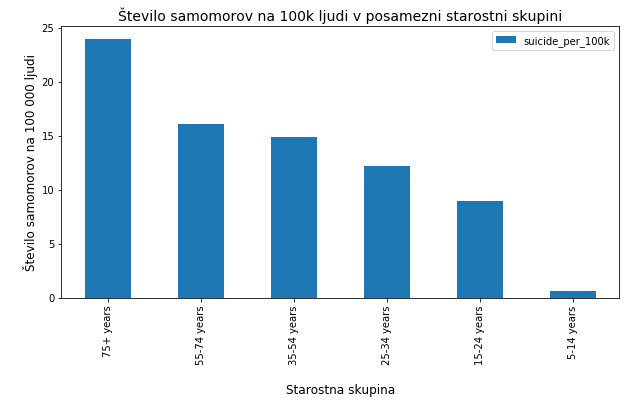

In [5]:
df = main[['age','suicide_per_100k']]
df1 = df.groupby(['age'], as_index=False).mean().sort_values(by=['suicide_per_100k'], ascending=False)
df2 = df1.reset_index(drop=True)
graf = df2.plot(kind='bar', x='age', legend=False, figsize=(10,5))
graf.legend();
graf.set_title("Število samomorov na 100k ljudi v posamezni starostni skupini", fontsize=14)
graf.set_xlabel("\nStarostna skupina", fontsize=12)
graf.set_ylabel("\nŠtevilo samomorov na 100 000 ljudi", fontsize=12);
plt.savefig('images/starostne_skupine.png')

Vidno je, da z leti možnost samomora narašča.

Število samomorov v posameznih letih na logaritmičnem grafu.

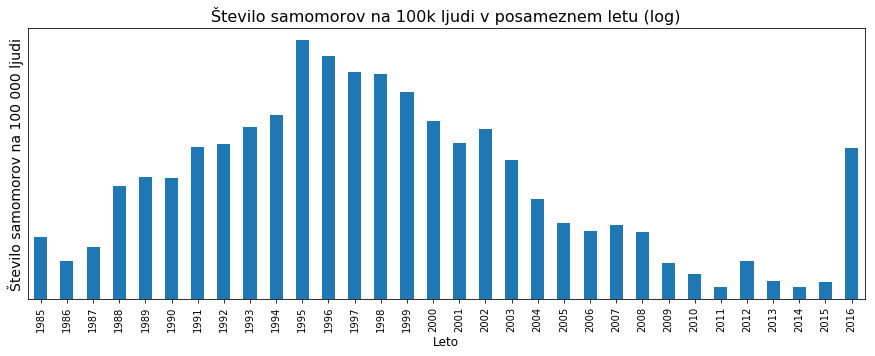

In [6]:
df = main[['year','suicide_per_100k']]
df1 = df.groupby(['year'], as_index=False).mean().sort_values(by=['suicide_per_100k'], ascending=False)
df2 = df1.reset_index(drop=True)
graf = df2.sort_values(by=['year']).plot(kind='bar', x='year', legend=False, logy=True, figsize=(15,5))
graf.set_title("Število samomorov na 100k ljudi v posameznem letu (log)", fontsize=16)
graf.set_xlabel("Leto", fontsize=12)
graf.set_ylabel("Število samomorov na 100 000 ljudi", fontsize=14);
plt.savefig('images/po_letih.png')

Tu je nekaj zanimivih stvari. Hitro naraščanje samomorov do leta 1995, še posebaj leta 1988 in 1995, potem pa hiter in enakomeren padec. Najbolj presenetljivo pa je leto 2016, kjer je razlika s prejšnjim letom daleč največja.